<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.5
## Feature Selection

### Data

**Predict the onset of diabetes based on diagnostic measures.**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

[Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database/download)

In [2]:
# IMPORT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set(rc={'figure.figsize': (15, 10)})

%matplotlib inline

#### 1. Load Data

In [3]:
# Read Data
diabetes_csv = 'dat/diabetes.csv'
diabetes = pd.read_csv(diabetes_csv)

#### 2. Perform EDA

Perform EDA. Check Null Values. Impute if necessary.

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
diabetes.duplicated().sum()

0

In [9]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### 3. Set Target

- Set `Outcome` as target.
- Set Features 

In [29]:
# Target column
# 1 = diabetic
# 0 = not
y = diabetes.Outcome
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


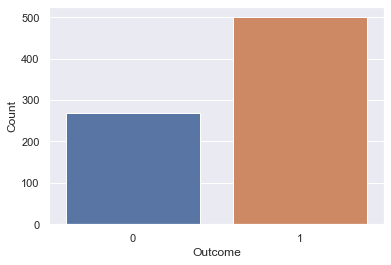

In [12]:
ax = sns.barplot(y, y.value_counts())
ax.set(xlabel='Outcome', ylabel='Count')
plt.show()

In [13]:
# Take all columns except target as predictor columns
predictor_columns = [c for c in diabetes.columns if c != 'Outcome']
X = diabetes[predictor_columns]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
scaler = StandardScaler()
scaler.fit(X)
standardised_X = scaler.transform(X)

In [15]:
print(scaler.n_samples_seen_ , scaler.n_features_in_)

768 8


In [16]:
# Load the dataset as a pandas data frame
Xs = pd.DataFrame(standardised_X, columns = predictor_columns)
Xs

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [17]:
corr_matrix = Xs.corr()

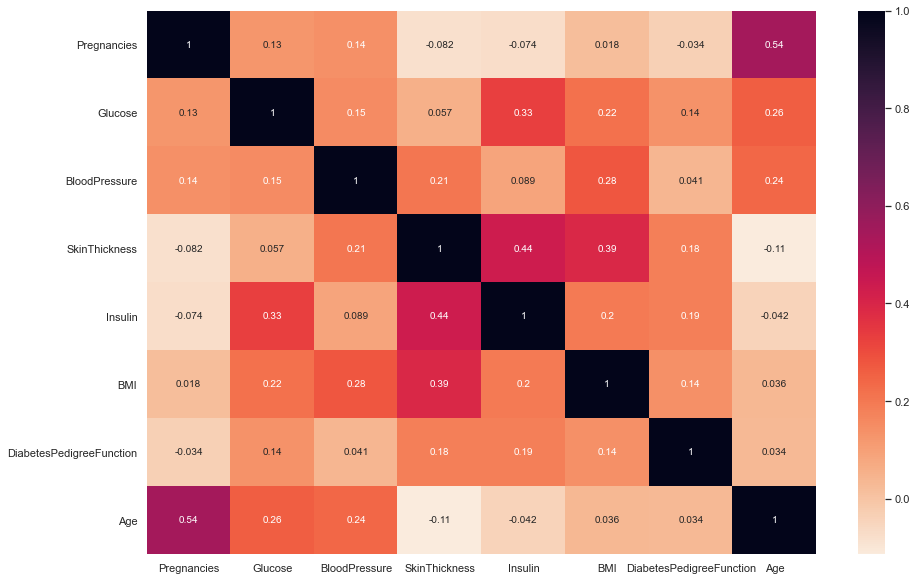

In [18]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 10))

#plt.figure(figsize=(16,8))
cmap = sns.cm.rocket_r
sns.heatmap(corr_matrix, annot=True, ax=ax, cmap=cmap)
plt.show()

In [19]:
corr_matrix = diabetes[predictor_columns].corr()

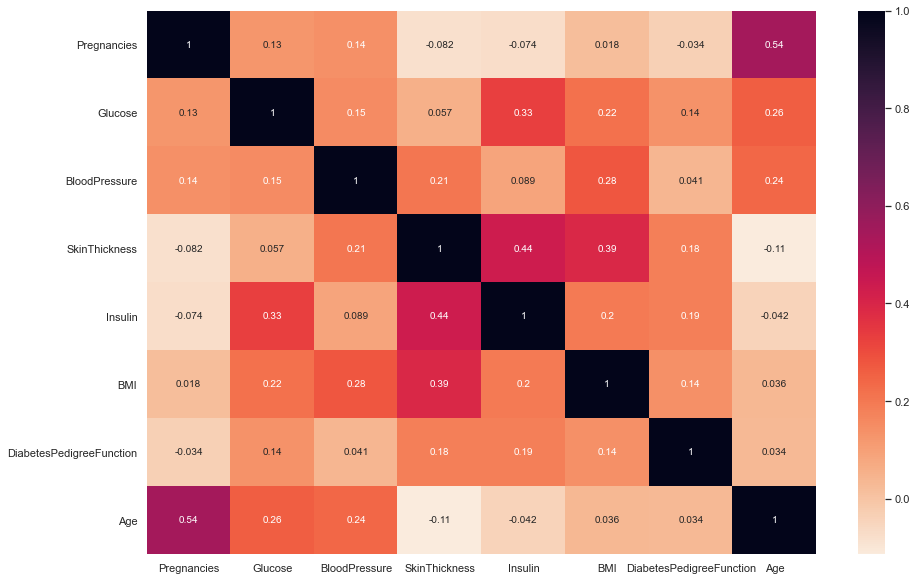

In [20]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 10))

#plt.figure(figsize=(16,8))
cmap = sns.cm.rocket_r
sns.heatmap(corr_matrix, annot=True, ax=ax, cmap=cmap)
plt.show()

#### 4. Select Feature

The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

##### 4.1 Univariate Selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method:

- SelectKBest removes all but the  highest scoring features
- Use sklearn.feature_selection.chi2 as score function
    > Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.


More Reads:
[Univariate feature selection](https://scikit-learn.org/stable/modules/feature_selection.html)

- Create an instance of SelectKBest
    - Use sklearn.feature_selection.chi2 as score_func
    - Use k of your choice
- Fit X, y 
- Find top 4 features
- Transform features to a DataFrame

In [21]:
# Create an instance of SelectKBest
from sklearn.feature_selection import SelectKBest, chi2

print(X.shape)

kbest = SelectKBest(chi2, k=2)

(768, 8)


In [22]:
# Fit 
X_1 = kbest.fit(X, y)
X_1

SelectKBest(k=2, score_func=<function chi2 at 0x000001469FB66280>)

In [23]:
# Print Score 
print(X_1.scores_)
# Find Top 4 Features
kbest_2 = SelectKBest(chi2, k=4)

[ 111.51969064 1411.88704064   17.60537322   53.10803984 2175.56527292
  127.66934333    5.39268155  181.30368904]


In [24]:
# Transform X to Features
X_2 = kbest_2.fit(X, y)
print(X_2.scores_)
X_2_new = X_2.transform(X)

[ 111.51969064 1411.88704064   17.60537322   53.10803984 2175.56527292
  127.66934333    5.39268155  181.30368904]


In [25]:
# Transform features to a dataframe
features_sel = X.columns[X_2.get_support(indices=False)]

X_2_df = pd.DataFrame(X_2_new, columns=features_sel)
X_2_df.head()

,Glucose,Insulin,BMI,Age
0,148.0,0.0,33.6,50.0
1,85.0,0.0,26.6,31.0
2,183.0,0.0,23.3,32.0
3,89.0,94.0,28.1,21.0
4,137.0,168.0,43.1,33.0


##### 4.2 Recursive feature elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

More Reads:
[Recursive feature elimination](https://scikit-learn.org/stable/modules/feature_selection.html)

- Use RFE to extract feature
    - use LogisticRegression as estimator
    - Number of n_features_to_select as of your choice
- Fit X, y to RFE
- Find Selected Features

In [26]:
y.shape

(768,)

In [27]:
# ANSWER
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Create the RFE object and rank each pixel
logres = LogisticRegression(max_iter=4000)
rfe = RFE(estimator=logres, n_features_to_select=4, step=1, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.


In [28]:
# Print Score 
print(rfe.score(X,y))
# Find Features
print('Best features: ')
print(X.columns[rfe.support_])
print(rfe.ranking_)
print(np.shape(rfe.ranking_))
print(np.shape(X.columns))
pd.DataFrame(rfe.ranking_, index=X.columns, columns=['Ranking'])

0.76953125
Best features: 
Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction'], dtype='object')
[1 1 3 5 4 1 1 2]
(8,)
(8,)


,Ranking
Pregnancies,1
Glucose,1
BloodPressure,3
SkinThickness,5
Insulin,4
BMI,1
DiabetesPedigreeFunction,1
Age,2




---



---



> > > > > > > > > © 2019 Institute of Data


---



---



